In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime
from pathlib import Path

In [38]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(15, 8),
    titlesize=25,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=25,
    titlepad=15,
)

In [2]:
datapath = Path("artifacts/data.csv")

In [7]:
datapath

WindowsPath('artifacts/rta_data.csv')

In [3]:
rta = pd.read_csv(datapath)

In [4]:
rta.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casualty,fitness_of_casualty,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Unknown,Unknown,Unknown,0,Unknown,Other,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,0,Unknown,Other,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Other,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,0,Unknown,Other,Not a Pedestrian,Overtaking,Slight Injury


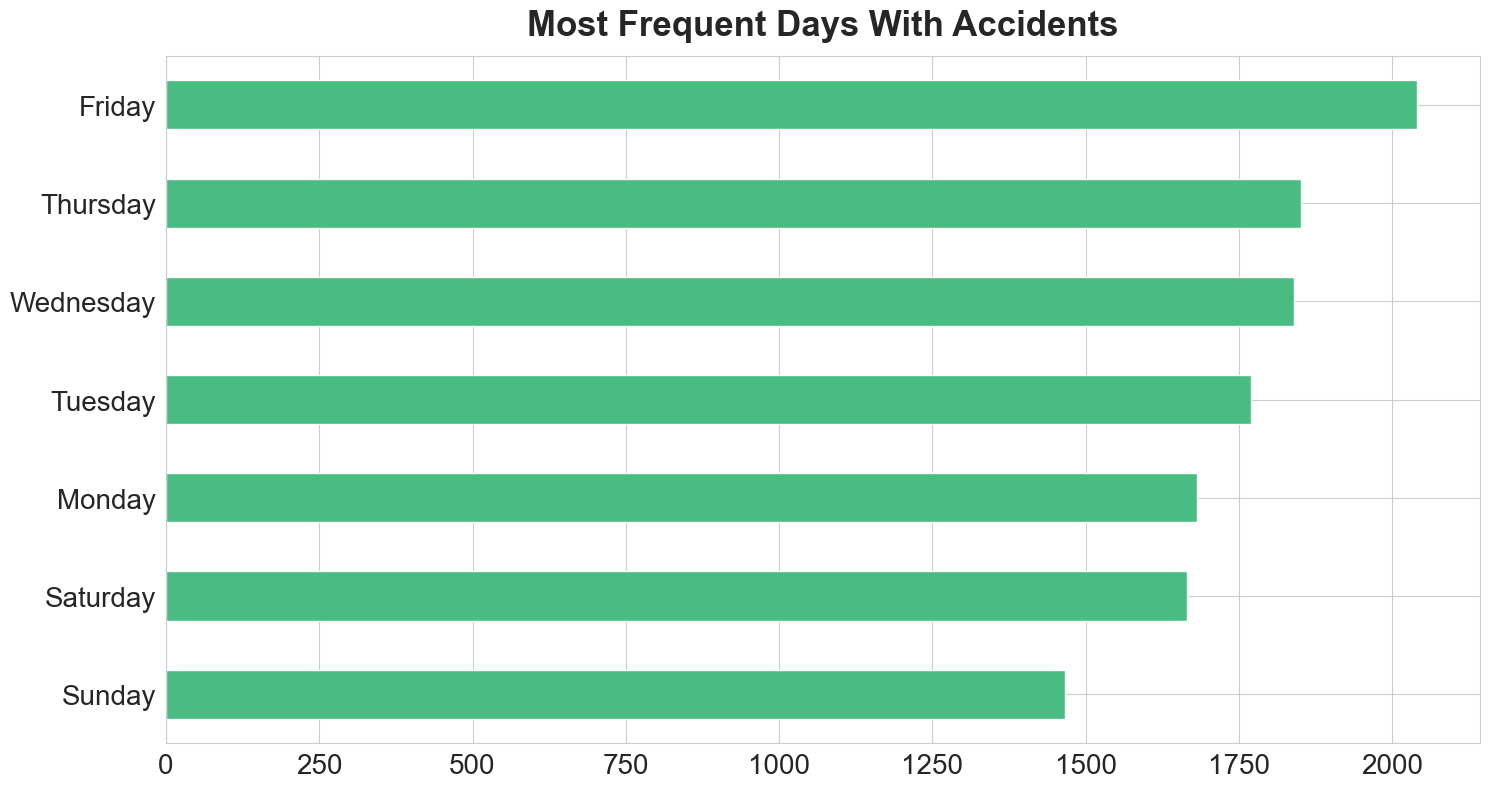

In [ ]:
rta.day_of_week.value_counts().sort_values().plot.barh(color="#49bd81")
plt.title("Most Frequent Days With Accidents")
plt.ylabel("", size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

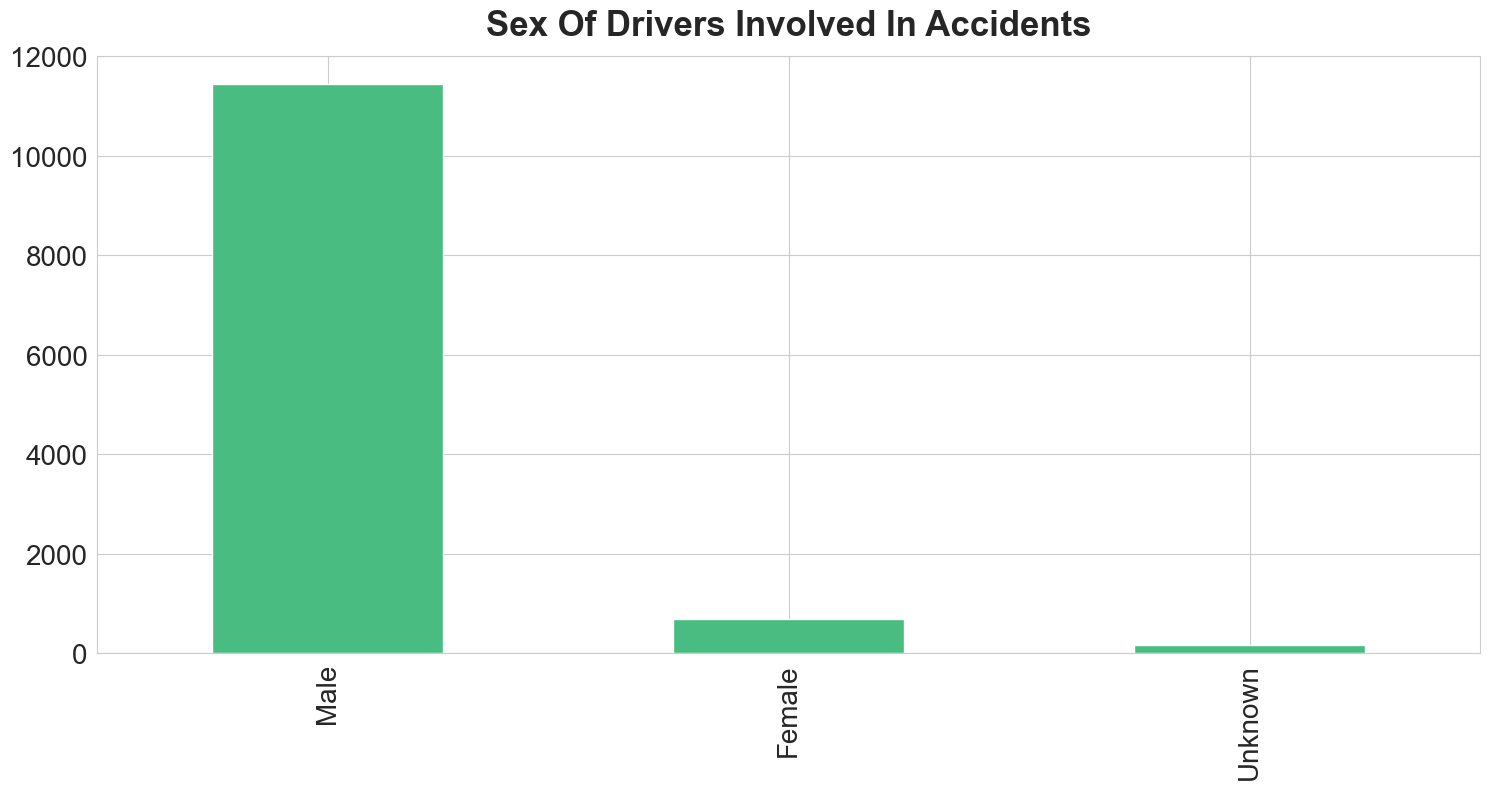

In [ ]:
rta.sex_of_driver.value_counts().plot.bar(color="#49bd81")
plt.title("Sex Of Drivers Involved In Accidents")
plt.xlabel("", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

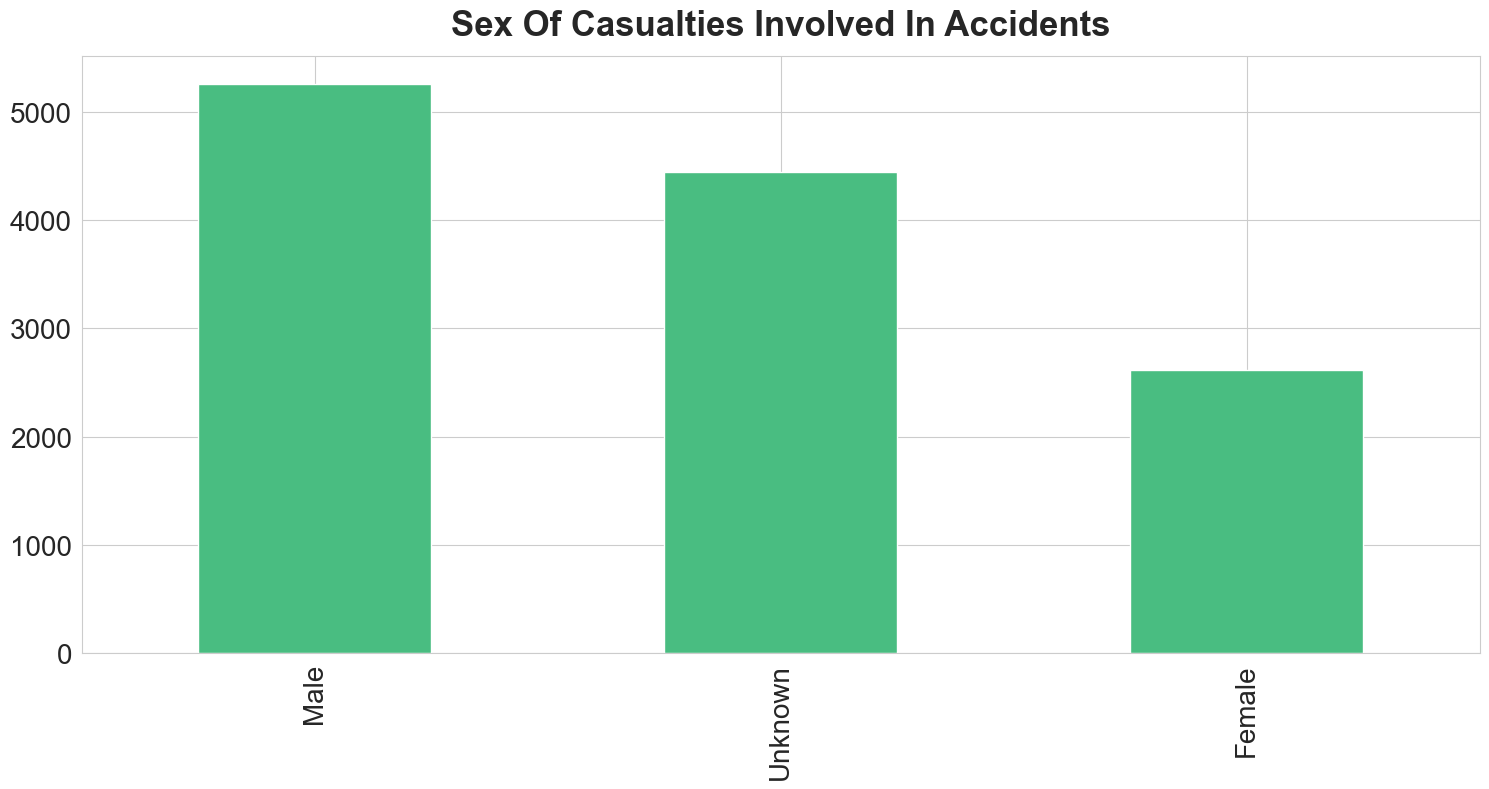

In [ ]:
rta.sex_of_casualty.value_counts().plot.bar(color="#49bd81")
plt.title("Sex Of Casualties Involved In Accidents")
plt.xlabel("", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [4]:
rta["hour"]= rta.time.apply(lambda x: datetime.strptime(x, "%H:%M:%S").time().hour)

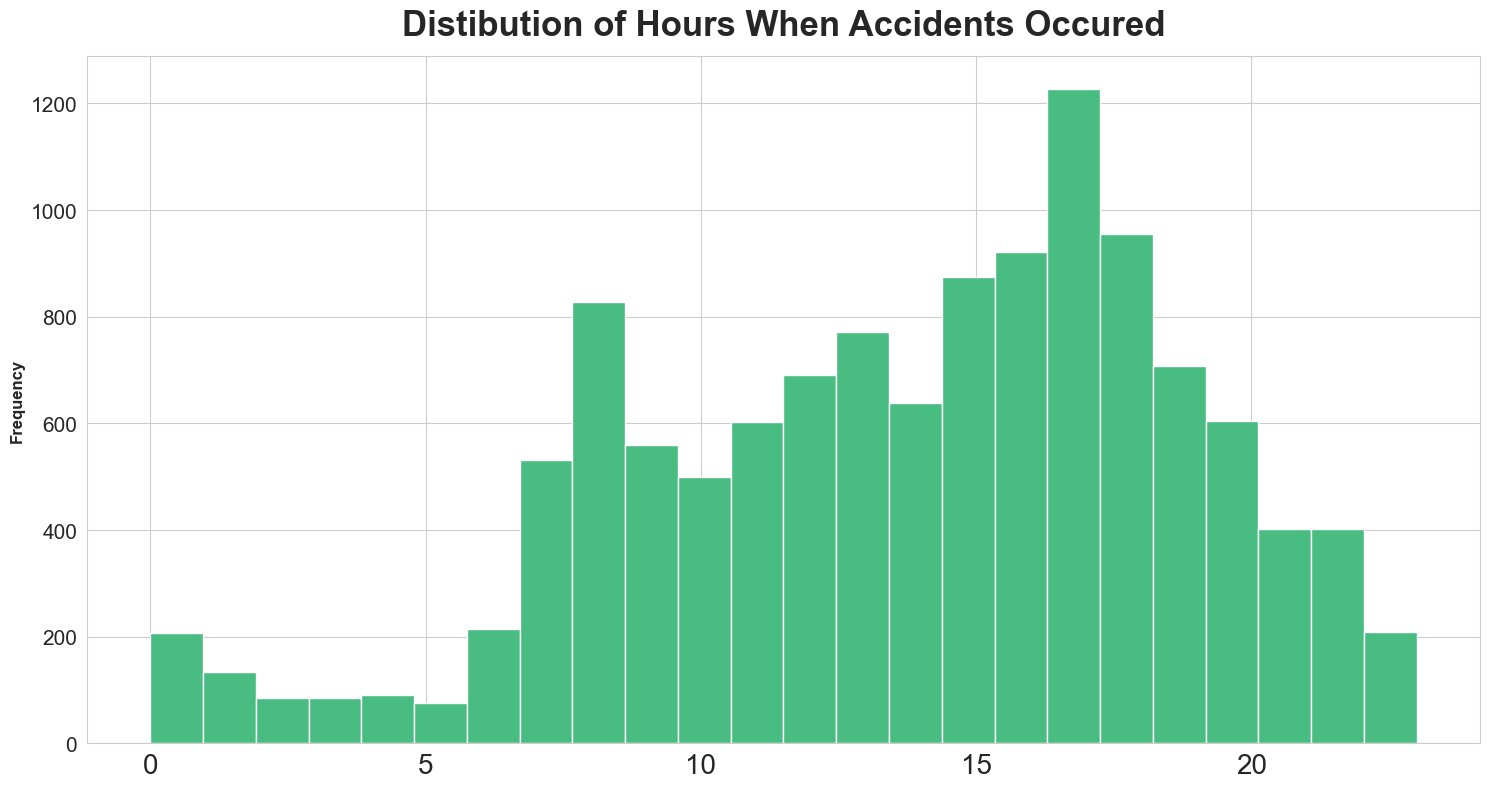

In [ ]:
rta["hour"].plot.hist(color="#49bd81", bins=24)
plt.title("Distibution of Hours When Accidents Occured")
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()


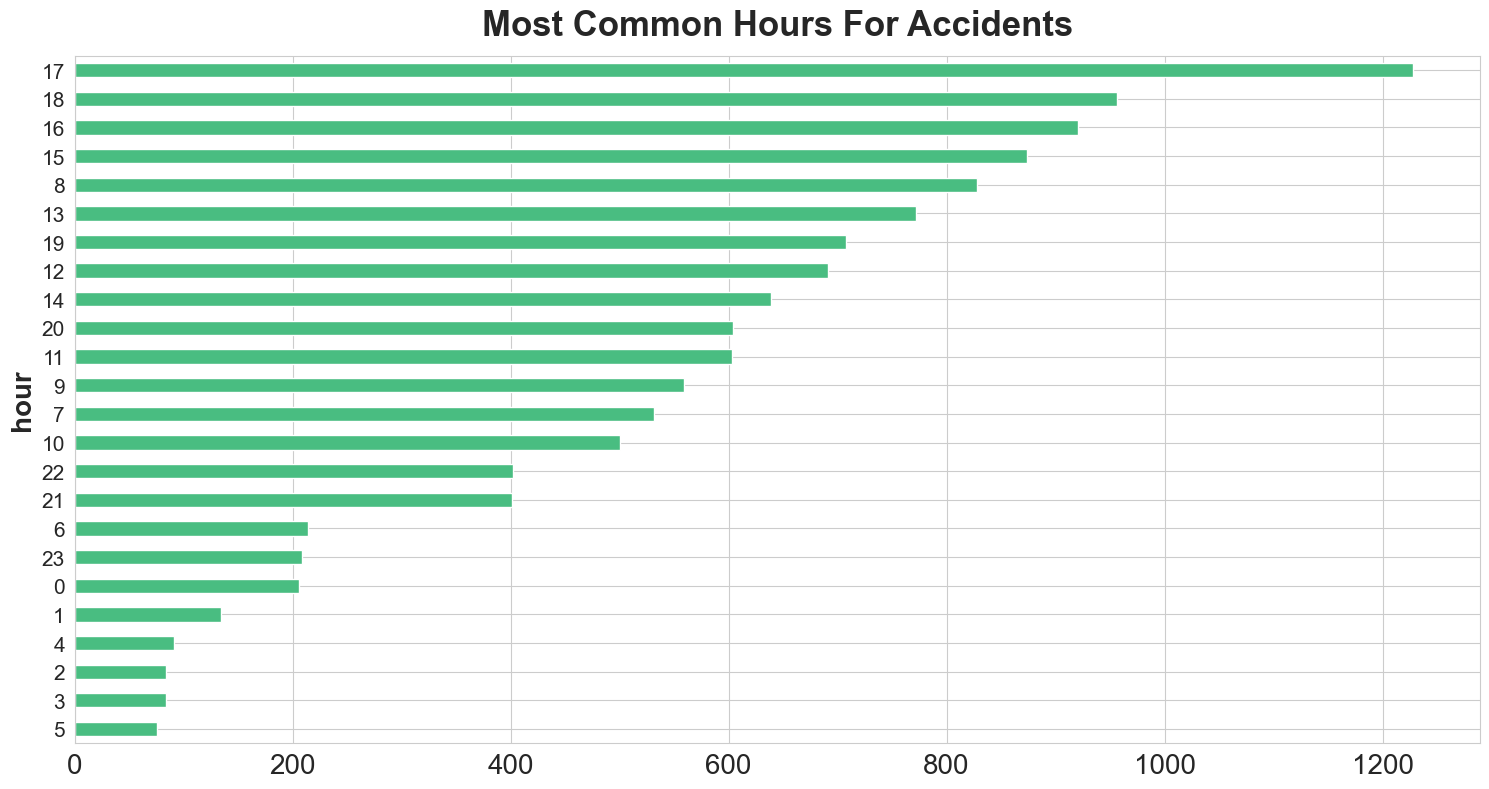

In [ ]:
rta.hour.value_counts().sort_values().plot.barh(color="#49bd81")
plt.title("Most Common Hours For Accidents")
plt.ylabel("hour", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [7]:
rta["accident_severity"].value_counts(normalize=True)

accident_severity
Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: proportion, dtype: float64

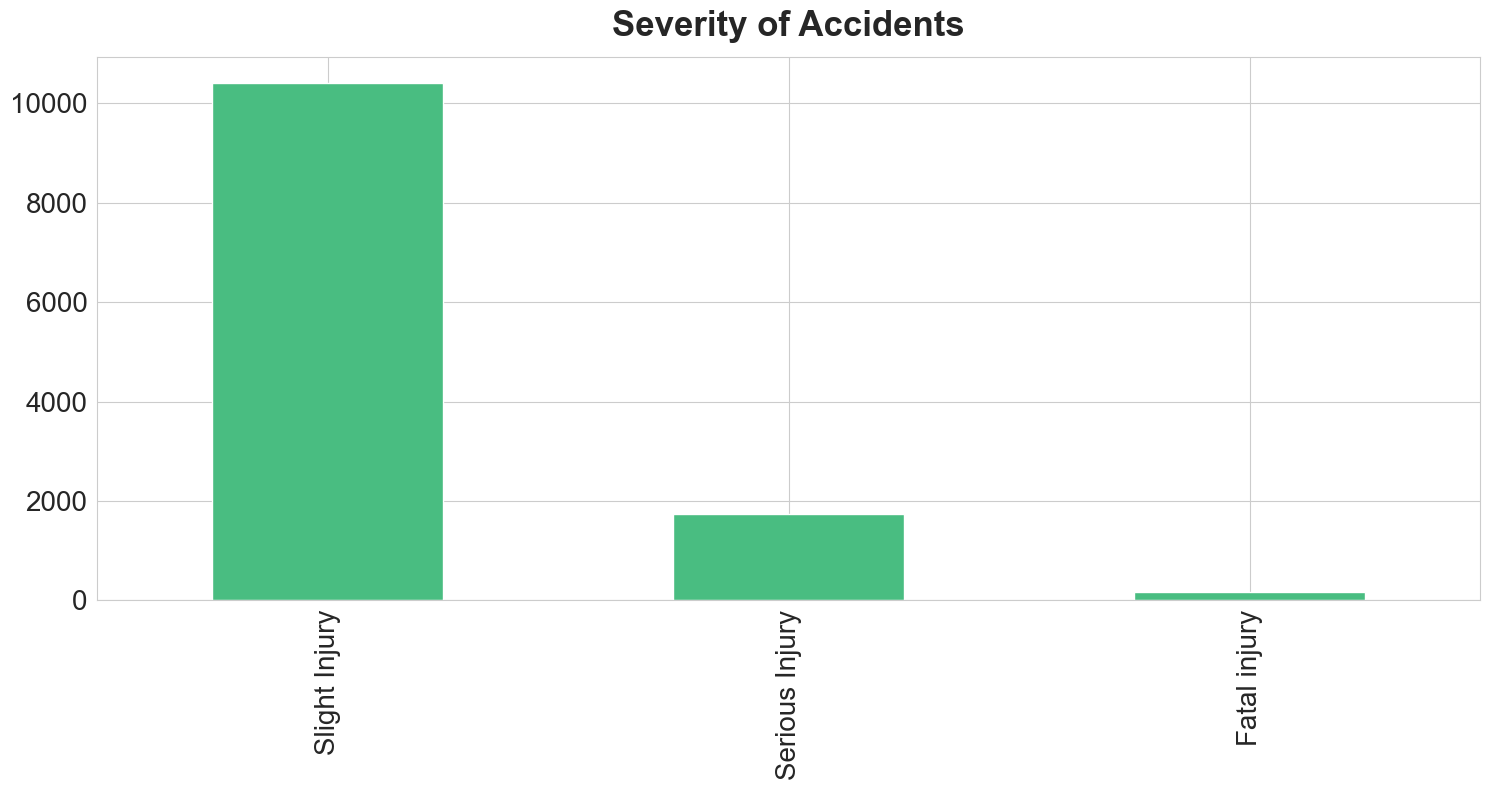

In [118]:
rta["accident_severity"].value_counts().plot.bar(color="#49bd81")
plt.xlabel("", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Severity of Accidents")
plt.show()

In [5]:
cols = [col for col in rta.columns if "casual" not in col]
X = rta[cols].copy().drop(["accident_severity", "time"], axis=1)
y = rta["accident_severity"]

In [7]:
X.head()

,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,...,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,vehicle_movement,pedestrian_movement,cause_of_accident,hour
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,0,...,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,Going straight,Not a Pedestrian,Moving Backward,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,0,...,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,0,...,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,Going straight,Not a Pedestrian,Changing lane to the left,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,0,...,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Changing lane to the right,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,0,...,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Going straight,Not a Pedestrian,Overtaking,1


In [6]:
X.replace(-1, 0, inplace=True)

In [7]:
X_cat = X.copy()
for col in X_cat.select_dtypes(include=["object"]).columns:
    X_cat[col] = X_cat[col].astype("category").cat.codes

In [8]:
kbest = SelectKBest(chi2, k=6)

In [9]:
best_6 = kbest.fit(X_cat, y)

In [10]:
features = best_6.get_feature_names_out()

In [11]:
features

array(['age_band_of_driver', 'defect_of_vehicle', 'light_conditions',
       'type_of_collision', 'number_of_vehicles_involved', 'hour'],
      dtype=object)

In [14]:
X

,age_band_of_driver,defect_of_vehicle,light_conditions,type_of_collision,number_of_vehicles_involved,hour
0,18-30,0,Daylight,Collision with roadside-parked vehicles,2,17
1,31-50,0,Daylight,Vehicle with vehicle collision,2,17
2,18-30,0,Daylight,Collision with roadside objects,2,17
3,18-30,0,Darkness - lights lit,Vehicle with vehicle collision,2,1
4,18-30,0,Darkness - lights lit,Vehicle with vehicle collision,2,1
...,...,...,...,...,...,...
12311,31-50,0,Daylight,Vehicle with vehicle collision,2,16
12312,Unknown,0,Daylight,Vehicle with vehicle collision,2,18
12313,Over 51,0,Daylight,Vehicle with vehicle collision,1,13
12314,18-30,0,Darkness - lights lit,Vehicle with vehicle collision,2,13


In [15]:
for col in X.columns:
    print(col, ":", X[col].unique())
    print("==============================================================================")

age_band_of_driver : ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
defect_of_vehicle : [0 7 5]
light_conditions : ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
type_of_collision : ['Collision with roadside-parked vehicles'
 'Vehicle with vehicle collision' 'Collision with roadside objects'
 'Collision with animals' 'Other' 'Rollover' 'Fall from vehicles'
 'Collision with pedestrians' 'With Train' 'Unknown']
number_of_vehicles_involved : [2 1 3 6 4 7]
hour : [17  1 14 22  8 15 12 18 13 20 16 21  9 10 19 11 23  7  0  5  6  4  3  2]


In [16]:
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: accident_severity, dtype: object

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

ohe = OneHotEncoder()
X = ohe.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [19]:
X_test

<2464x52 sparse matrix of type '<class 'numpy.float64'>'
	with 14784 stored elements in Compressed Sparse Row format>

In [50]:
lr = LogisticRegression(solver="newton-cg", class_weight="balanced")
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)

In [27]:
from sklearn.metrics import roc_auc_score, recall_score

In [34]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.02      0.54      0.05        28
           1       0.20      0.33      0.25       347
           2       0.89      0.55      0.68      2089

    accuracy                           0.52      2464
   macro avg       0.37      0.47      0.33      2464
weighted avg       0.79      0.52      0.61      2464



In [2]:
import pickle

In [3]:
with open("./artifacts/model.pkl", "rb") as f:
    model = pickle.load(f)

with open("./artifacts/x_preprocessor.pkl", "rb") as f:
    obj = pickle.load(f)

with open("./artifacts/y_preprocessor.pkl", "rb") as f:
    y_obj = pickle.load(f)

In [4]:
model

SVC(class_weight='balanced', probability=True, random_state=1)

In [7]:
import pandas as pd

In [8]:
train_data = pd.read_csv("./artifacts/train.csv")
test_data = pd.read_csv("./artifacts/test.csv")

In [9]:
train_data.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casualty,fitness_of_casualty,pedestrian_movement,cause_of_accident,accident_severity
0,18:13:00,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Long lorry,Owner,2-5yrs,...,Going straight,Unknown,Unknown,Unknown,0,Driver,Normal,Not a Pedestrian,No priority to vehicle,Serious Injury
1,14:52:00,Tuesday,Under 18,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,2-5yrs,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Serious Injury
2,12:45:00,Saturday,31-50,Male,High school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Unknown,Unknown,Unknown,0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
3,05:57:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Other,Governmental,5-10yrs,...,Moving Backward,Driver or rider,Male,18-30,3,Employee,Normal,Not a Pedestrian,No distancing,Slight Injury
4,15:36:00,Tuesday,Under 18,Male,Elementary school,Employee,2-5yr,Pick up upto 10Q,Owner,Unknown,...,Going straight,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury


In [10]:
from OmdenaKenyaRoadAccidents.utils import select_features, clean_df

In [11]:
train_data = clean_df(train_data)
test_data = clean_df(test_data)

In [26]:
train_data["accident_severity"].unique()

array(['Serious Injury', 'Slight Injury', 'Fatal injury'], dtype=object)

In [12]:
features = select_features(train_data)

In [13]:
features

array(['age_band_of_driver', 'driving_experience', 'defect_of_vehicle',
       'light_conditions', 'number_of_vehicles_involved',
       'cause_of_accident'], dtype=object)

In [25]:
for col in train_data[features].columns:
       print(col, train_data[col].unique())
       print("--------------------------------------------------------------------------")

age_band_of_driver ['18-30' 'Under 18' '31-50' 'Unknown' 'Over 51']
--------------------------------------------------------------------------
driving_experience ['5-10yr' 'Below 1yr' 'Above 10yr' '2-5yr' '1-2yr' 'No Licence' 'unknown']
--------------------------------------------------------------------------
defect_of_vehicle [0 7 5]
--------------------------------------------------------------------------
light_conditions ['Daylight' 'Darkness - lights lit' 'Darkness - lights unlit'
 'Darkness - no lighting']
--------------------------------------------------------------------------
number_of_vehicles_involved [3 2 1 6 4 7]
--------------------------------------------------------------------------
cause_of_accident ['No priority to vehicle' 'Driving under the influence of drugs'
 'Changing lane to the right' 'No distancing' 'Driving carelessly'
 'Changing lane to the left' 'Other' 'Driving to the left'
 'Moving Backward' 'No priority to pedestrian' 'Driving at high speed'
 'Overtak

In [14]:
X_train, y_train = train_data[features], train_data["accident_severity"]
X_test, y_test = test_data[features], test_data["accident_severity"]

In [ ]:
y_obj.inverse_transform(model.predict(obj.transform(df)))

array(['Serious Injury'], dtype=object)

In [15]:
X_train = obj.transform(X_train)

In [16]:
y_train = y_obj.transform(y_train)
X_test = obj.transform(X_test)
y_test = y_obj.transform(y_test)

In [17]:
model.fit(X_train, y_train)
l_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
import matplotlib.pyplot as plt

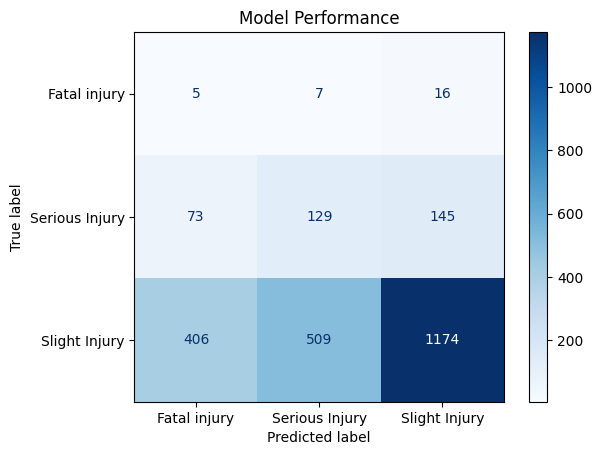

In [23]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, l_pred),
    display_labels = y_obj.inverse_transform(model.classes_)
).plot(cmap=plt.cm.Blues)
plt.title("Model Performance")
plt.show()
